In [1]:
import numpy as np
import control
import matplotlib.pyplot as plt

Parte 1:

Dado o sistema do slide 23 da apresentação 04 - Função de Transferência Amostrada:

Considere RC = 0,083  e T = 0,1 seg

Com o Matlab ou equivalente:

- Obtenha a função de transferência discreta equivalente;

- Verifique a resposta do sistema para uma entrada do tipo degrau unitário com a função step;

- Obtenha a equação recursiva do sistema;

- Verifique a resposta do sistema para uma entrada do tipo degrau unitário utilizando a equação recursiva;

- Verifique a resposta do sistema (solução exata) para uma entrada do tipo degrau unitário utilizando a transformada Z inversa da expressão Y(z) = H(z)E(z);

- Compare as respostas



In [ ]:
np.array()


Função de Transferência Contínua:
G = 
 
     1
-----------
0.083 s + 1


Função de Transferência Discreta:
Gz = 
 
  0.7003
----------
z - 0.2997

dt = 0.1



Text(0.5, 1.0, 'Eq. discreta')

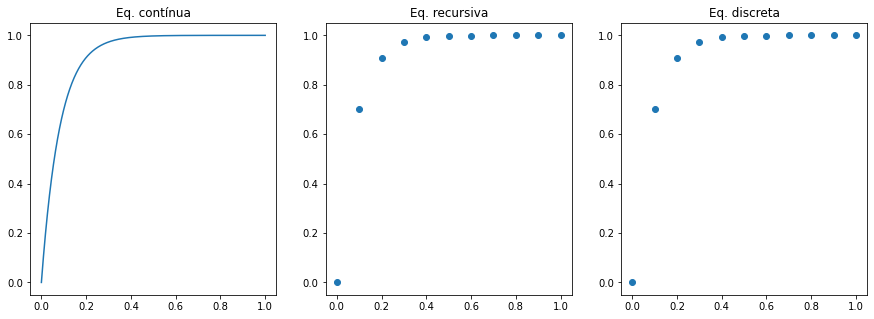

In [15]:
RC = 0.083
T = 0.1    # Período de amostragem 
Tf = 1     # Tempo final de simulação
plt.subplots(1,3, figsize=(15, 5)) 

# Respostas ao degrau
## Continua
num = 1;
den = [RC, 1];
G = control.tf(num,den); # 1/(sRC + 1)
print('\nFunção de Transferência Contínua:')
print("G = \n",G)

t = np.linspace(0, Tf, 999)
x, y = control.step_response(G, t);
plt.subplot(1,3,1)
plt.plot(x, y)
plt.title("Eq. contínua")



## Equação recursiva
Kmax = int((Tf+T)/T)
y = np.zeros(Kmax);
a = np.exp(-T/RC);
b = 1-np.exp(-T/RC);
for k in range(1, Kmax):
    y[k]=a*y[k-1] + b*1
    
plt.subplot(1,3,2)
plt.title("Eq. recursiva")
plt.plot(np.arange(0, Tf+T, T), y,'o')

## Discreta
Gz = control.c2d(G,T);
print('\nFunção de Transferência Discreta:')
print("Gz = \n",Gz)
x, y = control.step_response(Gz, Tf);
plt.subplot(1,3,3)
plt.plot(x, y, 'o')
plt.title("Eq. discreta")